# 02805 week 7 exercise
s202997 Nina Weng
## Exercise 1: Comparing word-counts of Marvel and DC heroes. [The longest exercise in the class 😱]. It consists of four steps. And it's great.

### Step one: TF List

The goal of this exercise is to create your own wordclouds, characterizing the two comic-book universes. Check out my awesome word-clouds below. I think it's pretty clear

In [6]:

# get the text from data_folder

import os
data_folder = './data/character wiki pages/marvel'

# the list we used for store the wiki page text
wikipages = []
txt_files = os.listdir(data_folder)
for f in txt_files:
    file_path = os.path.join(data_folder,f)
    with open(file_path,encoding='utf-8') as f:
        text = f.read()
    wikipages.append(text)
    
print('number or file in marvel network:{}'.format(len(wikipages)))
# print('average length of wikipage is:{}'.format())
print('the 3rd text:\n{}'.format(wikipages[3][0:2000]))

number or file in marvel network:1642
the 3rd text:
{{Infobox comics character
<!--Wikipedia:WikiProject Comics-->
| image   = Abomination (Emil Blonsky).jpg
| converted= y
| caption = Textless cover of ''[[Hulk (comic book)|Immortal Hulk]]'' #22 (Aug. 2019).<br>Art by [[Ryan Brown (comics)|Ryan Brown]]
| character_name = Abomination
| publisher = [[Marvel Comics]]
| debut   = ''[[Tales to Astonish]]'' #90 (April 1967)
| creators = [[Stan Lee]]<br>[[Gil Kane]]
| alter_ego = Emil Blonsky
| full_name =
| species = Human mutate
| homeworld =
| alliances =The [[KGB]]<br/>[[Advanced Idea Mechanics|A.I.M]]<br/>The Legion Accursed<br/>The [[Masters of Evil]]<br/>The [[Lethal Legion]]
| partners = The [[Leader (comics)|Leader]]<br/>Xeron the Star Slayer<br/>The [[Rhino (character)|Rhino]]<br/>The [[Galaxy Master]]<br/>[[MODOK]]
| aliases = Agent R-7<br/>The Ravager of Worlds
| supports =<!--optional-->
| powers  ={{Plainlist|
* Superhuman strength, speed, stamina and durability
* Regenerative 

In [8]:
# TEST
from nltk.tokenize import word_tokenize
text = wikipages[3]
word_tokenize(text[0:100])

['{',
 '{',
 'Infobox',
 'comics',
 'character',
 '<',
 '!',
 '--',
 'Wikipedia',
 ':',
 'WikiProject',
 'Comics',
 '--',
 '>',
 '|',
 'image',
 '=',
 'Abomination',
 '(',
 'Emil',
 'Blonsky',
 ')',
 '.jpg',
 '|',
 'converted=',
 'y',
 '|',
 'caption',
 '=',
 'Textless',
 'cover',
 'of',
 '``',
 '[',
 '[',
 'Hulk',
 '(',
 'comic',
 'book',
 ')',
 '|Immortal',
 'Hulk',
 ']',
 ']',
 "''",
 '#',
 '22',
 '(',
 'Aug.',
 '2019',
 ')',
 '.',
 '<',
 'br',
 '>',
 'Art',
 'by',
 '[',
 '[',
 'Ryan',
 'Brown',
 '(',
 'comics',
 ')',
 '|Ryan',
 'Brown',
 ']',
 ']',
 '|',
 'character_name',
 '=',
 'Abomination',
 '|',
 'publisher',
 '=',
 '[',
 '[',
 'Marvel',
 'Comics',
 ']',
 ']',
 '|',
 'debut',
 '=',
 '``',
 '[',
 '[',
 'Tales',
 'to',
 'Astonish',
 ']',
 ']',
 "''",
 '#',
 '90',
 '(',
 'April',
 '1967',
 ')',
 '|',
 'creators',
 '=',
 '[',
 '[',
 'Stan',
 'Lee',
 ']',
 ']',
 '<',
 'br',
 '>',
 '[',
 '[',
 'Gil',
 'Kane',
 ']',
 ']',
 '|',
 'alter_ego',
 '=',
 'Emil',
 'Blonsky',
 '|',
 'full_na

In [10]:
# 0*. clean the text (remove the useless part)
# (a). <ref> ... <ref>

# 1. Tokenize the pages into individual strings
# (into strings?? more like to list i guess)

from nltk.tokenize import word_tokenize
from tqdm import tqdm
tokenize = []
for text in tqdm(wikipages):
    tokenize.extend(word_tokenize(text))

100%|██████████████████████████████████████████████████████████████████████████████| 1642/1642 [01:00<00:00, 26.96it/s]


In [37]:
print('the first 200 "word"(fake!) of tokenize:\n{}'.format(tokenize[0:200]))

the first 200 "word"(fake!) of tokenize:
["'", "''", '3-D', 'Man', "''", "'", 'is', 'the', 'name', 'of', 'two', 'fictional', '[', '[', 'superhero', ']', ']', 'es', 'appearing', 'in', '[', '[', 'American', 'comic', 'book', ']', ']', 's', 'published', 'by', '[', '[', 'Marvel', 'Comics', ']', ']', '.', 'The', 'first', 'superhero', 'to', 'use', 'the', 'name', '3-D', 'Man', 'is', 'a', 'composite', 'of', 'two', 'brothers', ',', 'Charles', 'and', 'Hal', 'Chandler', ',', 'and', 'the', 'second', 'is', '[', '[', 'Delroy', 'Garrett', ']', ']', '.', 'The', 'first', '3-D', 'Man', 'appeared', 'in', '``', '[', '[', 'Marvel', 'Premiere', ']', ']', "''", '#', '35', '(', 'Apr', '1977', ')', ',', 'created', 'by', '[', '[', 'Roy', 'Thomas', ']', ']', 'and', '[', '[', 'Johnny', 'Craig|John', 'Craig', ']', ']', '.', '<', 'ref', '>', '{', '{', 'cite', 'book', '|last1=DeFalco', '|first1=Tom', '|last2=Sanderson', '|first2=Peter', '|last3=Brevoort', '|first3=Tom', '|last4=Teitelbaum', '|first4=Michael', '|last5

In [47]:
# 2. Remove all punctuation from your list of tokens
import re
# pattern =  r'^[a-zA-Z0-9][a-zA-Z0-9\-]*[a-zA-Z0-9]$|[a-zA-Z0-9]'
pattern =  r'[a-zA-Z0-9\-]+'
tokenize_nopunc = []
for w in tokenize:   
    tokenize_nopunc.extend(re.findall(pattern,w)) # w.isalnum()  function could not extract '3-D'
    #  bigrams_without_stopw_alnum = [pair for pair in bigrams_without_stopw if pair[0].isalnum() and pair[1].isalnum()]
print('the first 100 "word"(fake?) of tokenize:\n{}'.format(tokenize_nopunc[0:100]))

the first 100 "word"(fake?) of tokenize:
['3-D', 'Man', 'is', 'the', 'name', 'of', 'two', 'fictional', 'superhero', 'es', 'appearing', 'in', 'American', 'comic', 'book', 's', 'published', 'by', 'Marvel', 'Comics', 'The', 'first', 'superhero', 'to', 'use', 'the', 'name', '3-D', 'Man', 'is', 'a', 'composite', 'of', 'two', 'brothers', 'Charles', 'and', 'Hal', 'Chandler', 'and', 'the', 'second', 'is', 'Delroy', 'Garrett', 'The', 'first', '3-D', 'Man', 'appeared', 'in', 'Marvel', 'Premiere', '35', 'Apr', '1977', 'created', 'by', 'Roy', 'Thomas', 'and', 'Johnny', 'Craig', 'John', 'Craig', 'ref', 'cite', 'book', 'last1', 'DeFalco', 'first1', 'Tom', 'last2', 'Sanderson', 'first2', 'Peter', 'last3', 'Brevoort', 'first3', 'Tom', 'last4', 'Teitelbaum', 'first4', 'Michael', 'last5', 'Wallace', 'first5', 'Daniel', 'last6', 'Darling', 'first6', 'Andrew', 'last7', 'Forbeck', 'first7', 'Matt', 'last8', 'Cowsill', 'first8', 'Alan']


In [48]:
# 3. Set everything to lower case
tokenize_nopunc_lower = [w.lower() for w in tokenize_nopunc]
print('the first 100 "word"(fake?) of tokenize:\n{}'.format(tokenize_nopunc_lower[0:100]))

the first 100 "word"(fake?) of tokenize:
['3-d', 'man', 'is', 'the', 'name', 'of', 'two', 'fictional', 'superhero', 'es', 'appearing', 'in', 'american', 'comic', 'book', 's', 'published', 'by', 'marvel', 'comics', 'the', 'first', 'superhero', 'to', 'use', 'the', 'name', '3-d', 'man', 'is', 'a', 'composite', 'of', 'two', 'brothers', 'charles', 'and', 'hal', 'chandler', 'and', 'the', 'second', 'is', 'delroy', 'garrett', 'the', 'first', '3-d', 'man', 'appeared', 'in', 'marvel', 'premiere', '35', 'apr', '1977', 'created', 'by', 'roy', 'thomas', 'and', 'johnny', 'craig', 'john', 'craig', 'ref', 'cite', 'book', 'last1', 'defalco', 'first1', 'tom', 'last2', 'sanderson', 'first2', 'peter', 'last3', 'brevoort', 'first3', 'tom', 'last4', 'teitelbaum', 'first4', 'michael', 'last5', 'wallace', 'first5', 'daniel', 'last6', 'darling', 'first6', 'andrew', 'last7', 'forbeck', 'first7', 'matt', 'last8', 'cowsill', 'first8', 'alan']


In [50]:
# 4. (Optional) Lemmatize your words
import nltk
porter = nltk.PorterStemmer()
tokenize_nopunc_lower_lemmatize = [porter.stem(w) for w in tokenize_nopunc_lower]
print('the first 100 "word"(fake?) of tokenize:\n{}'.format(tokenize_nopunc_lower_lemmatize[0:100]))

the first 100 "word"(fake?) of tokenize:
['3-d', 'man', 'is', 'the', 'name', 'of', 'two', 'fiction', 'superhero', 'es', 'appear', 'in', 'american', 'comic', 'book', 's', 'publish', 'by', 'marvel', 'comic', 'the', 'first', 'superhero', 'to', 'use', 'the', 'name', '3-d', 'man', 'is', 'a', 'composit', 'of', 'two', 'brother', 'charl', 'and', 'hal', 'chandler', 'and', 'the', 'second', 'is', 'delroy', 'garrett', 'the', 'first', '3-d', 'man', 'appear', 'in', 'marvel', 'premier', '35', 'apr', '1977', 'creat', 'by', 'roy', 'thoma', 'and', 'johnni', 'craig', 'john', 'craig', 'ref', 'cite', 'book', 'last1', 'defalco', 'first1', 'tom', 'last2', 'sanderson', 'first2', 'peter', 'last3', 'brevoort', 'first3', 'tom', 'last4', 'teitelbaum', 'first4', 'michael', 'last5', 'wallac', 'first5', 'daniel', 'last6', 'darl', 'first6', 'andrew', 'last7', 'forbeck', 'first7', 'matt', 'last8', 'cowsil', 'first8', 'alan']


In [64]:
#  5. Create your TF list for each universe.
marvel_tf_list = nltk.FreqDist(tokenize_nopunc_lower_lemmatize)

In [65]:
marvel_tf_list

FreqDist({'the': 225920, 'and': 96942, 'of': 95029, 'ref': 92942, 'to': 90457, 'comic': 74953, 'a': 70806, 'in': 68884, 'marvel': 52240, 's': 42317, ...})

In [60]:
# define a function
import os
def tf_list_generate(data_folder):
    # the list we used for store the wiki page text
    wikipages = []
    txt_files = os.listdir(data_folder)
    for f in txt_files:
        file_path = os.path.join(data_folder,f)
        with open(file_path,encoding='utf-8') as f:
            text = f.read()
        wikipages.append(text)
        
    # 1. Tokenize the pages into individual strings
    # (into strings?? more like to list i guess)

    from nltk.tokenize import word_tokenize
    from tqdm import tqdm
    tokenize = []
    for text in tqdm(wikipages):
        tokenize.extend(word_tokenize(text))
    
    # 2. Remove all punctuation from your list of tokens
    import re
    # pattern =  r'^[a-zA-Z0-9][a-zA-Z0-9\-]*[a-zA-Z0-9]$|[a-zA-Z0-9]'
    pattern =  r'[a-zA-Z0-9\-]+'
    tokenize_nopunc = []
    for w in tokenize:   
        tokenize_nopunc.extend(re.findall(pattern,w)) # w.isalnum()  function could not extract '3-D'
#     print('the first 100 "word"(fake?) of tokenize:\n{}'.format(tokenize_nopunc[0:100]))
    
    # 3. Set everything to lower case
    tokenize_nopunc_lower = [w.lower() for w in tokenize_nopunc]
    
    # 4. (Optional) Lemmatize your words
    import nltk
    porter = nltk.PorterStemmer()
    tokenize_nopunc_lower_lemmatize = [porter.stem(w) for w in tokenize_nopunc_lower]
    
    #  5. Create your TF list for each universe.
    tf_list = nltk.FreqDist(tokenize_nopunc_lower_lemmatize)
    
    return tf_list

In [61]:
# get the tf_list for DC universe
data_folder_dc = './data/character wiki pages/dc'
dc_tf_list = tf_list_generate(data_folder_dc)

100%|██████████████████████████████████████████████████████████████████████████████| 1417/1417 [01:06<00:00, 21.31it/s]


In [62]:
dc_tf_list

FreqDist({'the': 258011, 'of': 119330, 'and': 105617, 'to': 98079, 'in': 88715, 'a': 85663, 'ref': 66131, 'comic': 59306, 's': 51768, 'is': 40699, ...})

### Step two: Word weights

In [86]:
# define a function to generate tf-tr list
def tf_tr_generate(tf_dict_self,tf_dict_other,c):
    tf_tr_list = {}
    for each in tf_dict_self:
        tf_self = tf_dict_self[each]
        tf_other = tf_dict_other[each] if each in tf_dict_other else 0
        w = tf_self/(tf_other + c)
        tf_tr_list[each] = w*tf_self
    return tf_tr_list

c = 100
marvel_tf_tr = tf_tr_generate(marvel_tf_list,dc_tf_list,c)
dc_tf_tr = tf_tr_generate(dc_tf_list,marvel_tf_list,c)

# sorted
marvel_tf_tr = sorted(marvel_tf_tr.items(), key=lambda item: item[1],reverse = True)
dc_tf_tr = sorted(dc_tf_tr.items(), key=lambda item: item[1],reverse = True)

In [87]:
# Check out top 10 for each universe. Does it make sense?
print('top 10 for TF-TR in marvel universe:\n{}'.format(marvel_tf_tr[:10]))
print('***********************')
print('top 10 for TF-TR in DC universe:\n{}'.format(dc_tf_tr[:10]))

top 10 for TF-TR in marvel universe:
[('x-men', 1263620.0478723403), ('marvel', 886332.4455992206), ('aveng', 473967.0406654344), ('spider-man', 423327.82102908276), ('mutant', 281387.03071672353), ('the', 197743.78620051063), ('wolverin', 171579.3913043478), ('thor', 168682.5), ('hulk', 165212.16571428571), ('ref', 130425.56150443146)]
***********************
top 10 for TF-TR in DC universe:
[('batman', 2642635.8288770053), ('dc', 1502926.0353817504), ('superman', 1464024.9943820224), ('leagu', 408295.6611842105), ('justic', 328070.51024590165), ('the', 294530.0244270419), ('lantern', 282033.2861356932), ('bizarro', 189944.55445544556), ('of', 149687.78080290975), ('gotham', 119526.14545454545)]


### Step three: Install the software


In [79]:
! pip install wordcloud

You are using pip version 19.0.3, however version 20.2.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Step four: Draw the wordclouds

In [92]:
# The package needs a single string to work on
# convert the freq list to the string

def tf_tr_to_string(tf_tr_list):
    word_list = []
    for w,tf_tr in tf_tr_list:
        times = round(tf_tr)
        word_list.extend([w]*times)
    string = ' '.join(word_list)
    return string

marvel_str = tf_tr_to_string(marvel_tf_tr)
dc_str = tf_tr_to_string(dc_tf_tr)

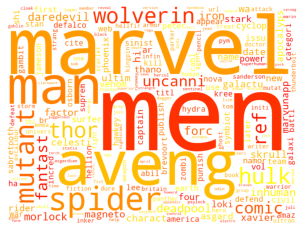

In [99]:
# 
# reate a word-cloud for each universe
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    max_words= 200,
    background_color = 'white',
                      width=800,
                      height=600,
                        collocations=False,
    colormap= 'autumn'
                     ).generate(marvel_str)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#If you'd like, you can remove stopwords/wiki-syntax - I did a bit of that for my own wordclouds.)
# so, (a) stopwords
# (b) wiki-syntax ---> the cleaning thing

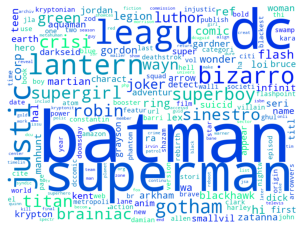

In [100]:
# DC
wordcloud = WordCloud(
    max_words= 200,
    background_color = 'white',
                      width=800,
                      height=600,
                        collocations=False,
    colormap= 'winter'
                     ).generate(dc_str)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()